***
# The Spark Foundation - Task 6
***
### Author : Nitish Kumar K V
## Prediction using Decision Tree Algorithm
From the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

`The Dataset has no null values.`
***

***
### **Data Visualization**

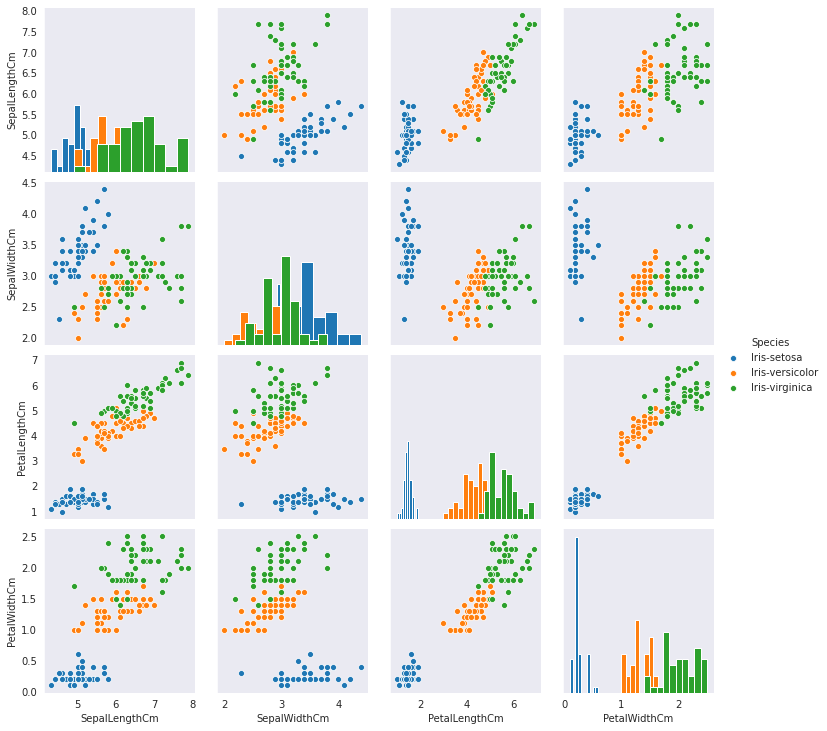

In [6]:
sns.set_style("dark")
sns.pairplot(data[data.columns[1:]], diag_kind="hist", hue="Species")

We can already see from the plot that a cut around `Petal Length ~ 2.5cm` or `Petal Width ~ 0.8cm`, seperates `Iris-setosa` from the species `Iris-vericolor and Iris-virginica`. For seperating Iris-vericolor and Iris-virginica we may require some other condition which we will find using decision trees.
***

***
### **Preparing the data**

In [7]:
X = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = data.Species.values.reshape([150,1])

In [8]:
# Splitting the data into training, validation and test sets

from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split( X, y, test_size=0.3, random_state=4)
X_val, X_test, y_val, y_test = train_test_split( X_, y_, test_size=0.5, random_state=4)

print("Training size = ", X_train.shape[0])
print("Validation size = ", X_val.shape[0])
print("Test size = ", X_test.shape[0])

Training size =  105
Validation size =  22
Test size =  23


***
### **Training the Decision Tree Model**

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
no_of_depths=6

ac_val=[]
ac_train=[]

for d in range(1,no_of_depths+1):
    model_DT = DecisionTreeClassifier(criterion="gini", max_depth=d).fit(X_train, y_train)
    yhat=model_DT.predict(X_val)
    ac_val.append(metrics.accuracy_score(y_val,yhat))
    
    yhat=model_DT.predict(X_train)
    ac_train.append(metrics.accuracy_score(y_train,yhat))

NameError: name 'metrics' is not defined

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=[7,5])

plt.plot([i for i in range(1,7)], np.array(ac_train)*100, "r.",linestyle="-",  markersize=10, label="Train_Set")
plt.plot([i for i in range(1,7)], np.array(ac_val)*100, "y.",linestyle="-",  markersize=10, label="Val_Set")

plt.title("Accuracy")
plt.xlabel("Depth of the Decision Tree")
plt.ylabel("Accuracy(%)")
plt.legend()
plt.show()

We can see from the above plot that the validation set accuracy doesn't increase after depth 2 and train set accuracy reaches approximately 100% at depth 4. `So, we can choose 4 as the optimum depth of the decision tree model.` Otherwise we may overfit the training set.
***

***
### Visualizing the Decision Tree

In [ ]:
from sklearn import tree
import graphviz

model = DecisionTreeClassifier(criterion="entropy", max_depth=4).fit(X_train, y_train)
model_img = tree.export_graphviz(model, out_file=None, 
                                feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],  
                                class_names=["Iris-setosa","Iris-vericolor", "Iris-virginica"],
                                filled=True,
                                rounded = True)

graph = graphviz.Source(model_img, format="png") 
graph.render("Decision_tree_classifier")

In [ ]:
from IPython.display import Image
Image(filename = "Decision_tree_classifier.png", width = 1200, height = 1000)

As expected before a cut of `Petal Width = 0.8cm`, completely seperates `Iris-setosa` from the species `Iris-vericolor and Iris-virginica`.
***

***
### **Model Evaluation on Test data**

In [11]:
from sklearn.metrics import f1_score, accuracy_score

ypred = model.predict(X_test)
accuracy = accuracy_score(y_test, ypred)*100
F1_score = f1_score(y_test, ypred, average="weighted")

print("Accuracy: %0.4f" % accuracy,"%")
print("F1_score: %0.2f" % F1_score)

NameError: name 'model' is not defined

This decision tree model has good accuracy. Now we can feed any new data to the model and it would be able to predict the right species.